In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# label load

In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(935, 262)


# decoder load

In [7]:
#decoder = load_model('./save_models/ae/stacked_decoder_v7.h5')

In [8]:
decoder = load_model('./save_models/decoder_models/residual_decoder_v22.h5')

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [9]:
pred = pd.read_excel('./pred_han_rae_v9.xlsx')
pred = pred.drop(['Unnamed: 0'], axis=1)
pred

,0,1,2,3
0,1.188579,2.532322,0.144621,1.450038
1,5.836023,5.268516,-0.028929,4.488597
2,2.144059,1.174375,0.237854,1.774034
3,6.326723,5.905469,0.058739,5.335026
4,4.907696,5.013404,0.024541,4.420409
...,...,...,...,...
930,0.535134,2.207429,-0.083110,1.248372
931,0.849245,2.345212,-0.025977,1.119982
932,1.075615,1.953875,-0.042287,1.109615
933,1.040372,2.837477,-0.196342,1.333563


In [10]:
test_decode = decoder.predict(np.array(pred))
test_decode

array([[1.21876772e-03, 3.36321094e-03, 1.67507026e-02, ...,
        1.50529653e-04, 5.48998266e-03, 1.26270121e-02],
       [2.89247506e-08, 1.04087341e-07, 1.53147468e-08, ...,
        1.26632460e-06, 9.08938148e-07, 1.02613985e-05],
       [3.46953794e-03, 1.27709226e-03, 8.04116600e-04, ...,
        1.06633030e-01, 2.86840623e-06, 9.92756453e-04],
       ...,
       [1.69147062e-03, 2.20751693e-03, 7.76068633e-03, ...,
        6.76546697e-05, 6.11495634e-04, 1.37106571e-02],
       [2.09219943e-04, 3.31045623e-04, 4.45392616e-02, ...,
        3.58502184e-05, 8.01367965e-03, 7.68331625e-03],
       [4.46641212e-03, 2.83539155e-03, 2.14975051e-04, ...,
        2.66782677e-04, 3.68327077e-04, 8.25256296e-03]], dtype=float32)

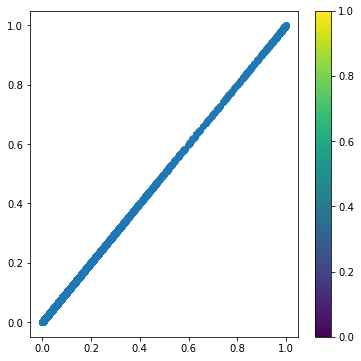

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [12]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [13]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [15]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [16]:
#c_matrix.shape

In [17]:
#c_matrix

In [18]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.058823529411764705
precision :  0.4339622641509434
recall :  0.08308248043347381
f1 :  0.1394643759474482
------------------------
hamming_loss :  0.006951871657754011


In [19]:
"""test_predict_df = pd.DataFrame(test_predict)
test_predict_df"""

'test_predict_df = pd.DataFrame(test_predict)\ntest_predict_df'

In [20]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')